In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special 
from scipy.optimize import curve_fit
from scipy.special import erf
import math

In [20]:
summary_table_new = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Resonator sample 3\Measurements\Type 1\resonators3_1_14012020.xlsx')
#summary_table_new = summary_table_new.drop([15, 54, 62], axis=0)

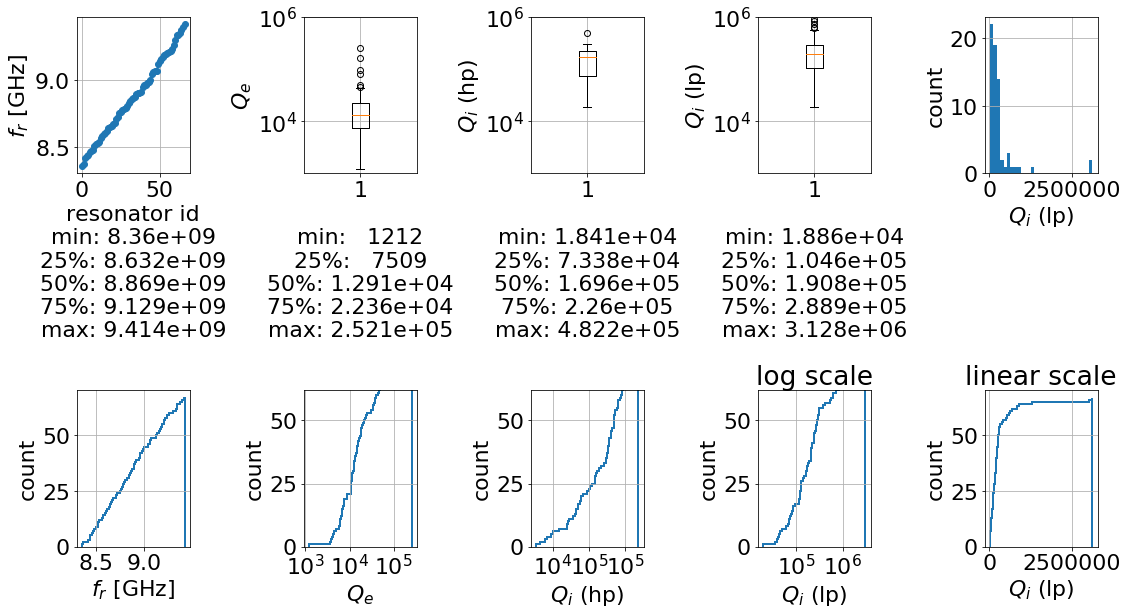

In [21]:
from matplotlib.ticker import FormatStrFormatter
figs, ax = plt.subplots(2,5, figsize=(16, 9))
c = 'fr'
ax[0,0].plot(summary_table_new[c]/1e9, marker='o')
ax[0,0].set_xlabel('resonator id\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,0].set_ylabel('$f_r$ [GHz]')
ax[0,0].grid(True, which='both')
c = 'Qe'
ax[0,1].boxplot(summary_table_new['Qe'])
ax[0,1].set_yscale('log')
ax[0,1].grid(True, which='both')
ax[0,1].set_ylabel('$Q_e$')
ax[0,1].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,1].set_ylim(1e3, 1e6)
c = 'Qi_hp'
ax[0,2].boxplot(summary_table_new['Qi_hp'])
ax[0,2].set_ylabel('$Q_i$ (hp)')
ax[0,2].set_yscale('log')
ax[0,2].grid(True, which='both')
ax[0,2].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,2].set_ylim(1e3, 1e6)
c = 'Qi_lp'
ax[0,3].boxplot(summary_table_new['Qi_lp'])
ax[0,3].set_ylabel('$Q_i$ (lp)')
ax[0,3].set_yscale('log')
ax[0,3].grid(True, which='both')
ax[0,3].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,3].set_ylim(1e3, 1e6)

ax[1,0].hist(summary_table_new['fr']/1e9, cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,0].set_xlabel('$f_r$ [GHz]')
ax[1,0].set_ylabel('count')
ax[1,0].grid(True, which='both')
#ax[1,0].set_ylim(20,62)
c = 'Qe'
ax[1,1].hist(np.log10(summary_table_new['Qe']), cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,1].grid(True, which='both')
ax[1,1].set_ylabel('count')
ax[1,1].set_xlabel('$Q_e$')
ax[1,1].set_ylim(0,62)
ax[1,1].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
c = 'Qi_hp'
ax[1,2].hist(np.log10(summary_table_new['Qi_hp']), cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,2].set_xlabel('$Q_i$ (hp)')
ax[1,2].grid(True, which='both')
ax[1,2].set_ylabel('count')
ax[1,2].set_ylim(0,62)
ax[1,2].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))

c = 'Qi_lp'
n, bins, patches = ax[1,3].hist(np.log10(summary_table_new['Qi_lp']), cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,3].set_xlabel('$Q_i$ (lp)')
ax[1,3].grid(True, which='both')
ax[1,3].set_ylabel('count')
ax[1,3].set_ylim(0,62)
ax[1,3].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
ax[1,3].set_title('log scale')

n_lin, bins_lin, patches = ax[1,4].hist(summary_table_new['Qi_lp'], cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,4].set_xlabel('$Q_i$ (lp)')
ax[1,4].grid(True, which='both')
ax[1,4].set_ylabel('count')
#ax[1,4].set_ylim(0,62)
#ax[1,4].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
ax[1,4].set_title('linear scale')

ax[0,4].hist(summary_table_new['Qi_lp'], cumulative=False, histtype='bar', linewidth=2, bins=30)
#n_lin, bins_lin, patches = ax[0,4].hist(np.log10(summary_table_new['Qi_lp']), cumulative=False, histtype='bar', linewidth=2, bins=30)
ax[0,4].set_xlabel('$Q_i$ (lp)')
ax[0,4].grid(True, which='both')
ax[0,4].set_ylabel('count')
#ax[0,4].set_ylim(0,62)

plt.tight_layout()
#plt.suptitle(sample_name)
#plt.savefig('{0}/{1}-boxplot.pdf'.format(save_path, sample_name))

In [22]:
max(summary_table_new['Qi_lp'])
#summary_table_new['Qi_lp']
len(summary_table_new['Qi_lp'])

67

In [23]:
bins = (bins[1:] + bins[:len(bins)-1])/2
bins_lin = (bins_lin[1:] + bins_lin[:len(bins_lin)-1])/2

In [24]:
def fitfunc(x, mu, sigma):
    return (erf((x-mu)/(np.sqrt(2)*sigma))+1)/2*63

logarithmic parameters:
found mu:  5.207373981472362
found sigma:  0.3452289895648734
linear parameters:
found mu:  177291.34768873244
found sigma:  140891.36821441242


Text(0.5, 1.0, 'linear')

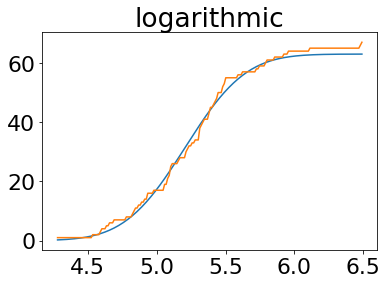

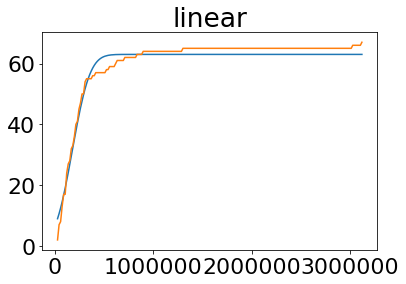

In [25]:
a, b = curve_fit(fitfunc, bins, n)
mu_found = a[0]
print('logarithmic parameters:')
print('found mu: ', mu_found)
sigma_found = a[1]
print('found sigma: ', sigma_found)
plt.figure()
plt.plot(bins, fitfunc(bins, mu_found, sigma_found))
plt.plot(bins, n)
plt.title('logarithmic')

a, b = curve_fit(fitfunc, bins_lin, n_lin, [30000, 5000])
mu_found_lin = a[0]
print('linear parameters:')
print('found mu: ', mu_found_lin)
sigma_found_lin = a[1]
print('found sigma: ', sigma_found_lin)
plt.figure()
plt.plot(bins_lin, fitfunc(bins_lin, mu_found_lin, sigma_found_lin))
plt.plot(bins_lin, n_lin)
plt.title('linear')

logarithmic parameters:
found mu:  4.940692015614826
found sigma:  0.20391696948155696
linear parameters:
found mu:  91795.2849969312
found sigma:  41059.10797723632


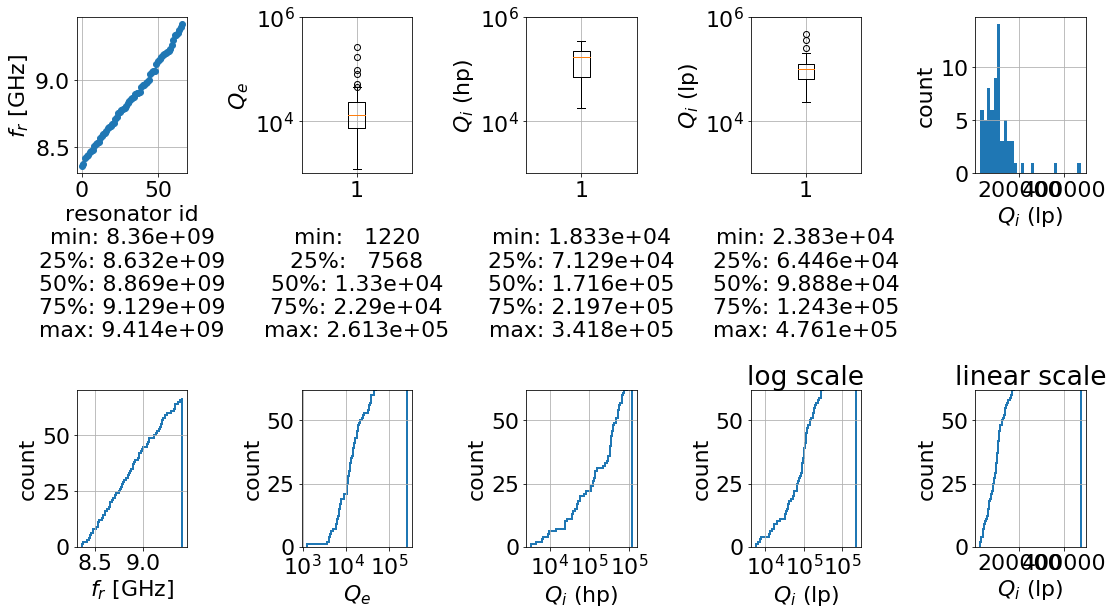

<Figure size 432x288 with 0 Axes>

In [26]:
summary_table_new = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Resonator sample 3\Measurements\Type 1\resonators3_1_14012020_2.xlsx')
from matplotlib.ticker import FormatStrFormatter
figs, ax = plt.subplots(2,5, figsize=(16, 9))
c = 'fr'
ax[0,0].plot(summary_table_new[c]/1e9, marker='o')
ax[0,0].set_xlabel('resonator id\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,0].set_ylabel('$f_r$ [GHz]')
ax[0,0].grid(True, which='both')
c = 'Qe'
ax[0,1].boxplot(summary_table_new['Qe'])
ax[0,1].set_yscale('log')
ax[0,1].grid(True, which='both')
ax[0,1].set_ylabel('$Q_e$')
ax[0,1].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,1].set_ylim(1e3, 1e6)
c = 'Qi_hp'
ax[0,2].boxplot(summary_table_new['Qi_hp'])
ax[0,2].set_ylabel('$Q_i$ (hp)')
ax[0,2].set_yscale('log')
ax[0,2].grid(True, which='both')
ax[0,2].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,2].set_ylim(1e3, 1e6)
c = 'Qi_lp'
ax[0,3].boxplot(summary_table_new['Qi_lp'])
ax[0,3].set_ylabel('$Q_i$ (lp)')
ax[0,3].set_yscale('log')
ax[0,3].grid(True, which='both')
ax[0,3].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0,3].set_ylim(1e3, 1e6)

ax[1,0].hist(summary_table_new['fr']/1e9, cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,0].set_xlabel('$f_r$ [GHz]')
ax[1,0].set_ylabel('count')
ax[1,0].grid(True, which='both')
#ax[1,0].set_ylim(20,62)
c = 'Qe'
ax[1,1].hist(np.log10(summary_table_new['Qe']), cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,1].grid(True, which='both')
ax[1,1].set_ylabel('count')
ax[1,1].set_xlabel('$Q_e$')
ax[1,1].set_ylim(0,62)
ax[1,1].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
c = 'Qi_hp'
ax[1,2].hist(np.log10(summary_table_new['Qi_hp']), cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,2].set_xlabel('$Q_i$ (hp)')
ax[1,2].grid(True, which='both')
ax[1,2].set_ylabel('count')
ax[1,2].set_ylim(0,62)
ax[1,2].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))

c = 'Qi_lp'
n2, bins2, patches2 = ax[1,3].hist(np.log10(summary_table_new['Qi_lp']), cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,3].set_xlabel('$Q_i$ (lp)')
ax[1,3].grid(True, which='both')
ax[1,3].set_ylabel('count')
ax[1,3].set_ylim(0,62)
ax[1,3].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
ax[1,3].set_title('log scale')

n_lin2, bins_lin2, patches2 = ax[1,4].hist(summary_table_new['Qi_lp'], cumulative=True, histtype='step', linewidth=2, bins=200)
ax[1,4].set_xlabel('$Q_i$ (lp)')
ax[1,4].grid(True, which='both')
ax[1,4].set_ylabel('count')
ax[1,4].set_ylim(0,62)
#ax[1,4].xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
ax[1,4].set_title('linear scale')

ax[0,4].hist(summary_table_new['Qi_lp'], cumulative=False, histtype='bar', linewidth=2, bins=30)
#ax[0,4].hist(np.log10(summary_table_new['Qi_lp']), cumulative=False, histtype='bar', linewidth=2, bins=30)
ax[0,4].set_xlabel('$Q_i$ (lp)')
ax[0,4].grid(True, which='both')
ax[0,4].set_ylabel('count')

plt.tight_layout()

bins2 = (bins2[1:] + bins2[:len(bins2)-1])/2
bins_lin2 = (bins_lin2[1:] + bins_lin2[:len(bins_lin2)-1])/2

a2, b2 = curve_fit(fitfunc, bins2, n2)
mu_found2 = a2[0]
print('logarithmic parameters:')
print('found mu: ', mu_found2)
sigma_found2 = a2[1]
print('found sigma: ', sigma_found2)
plt.figure()

a3, b3 = curve_fit(fitfunc, bins_lin2, n_lin2, [30000, 10000])
mu_found_lin2 = a3[0]
print('linear parameters:')
print('found mu: ', mu_found_lin2)
sigma_found_lin2 = a3[1]
print('found sigma: ', sigma_found_lin2)

Text(0.5, 1.0, 'linear')

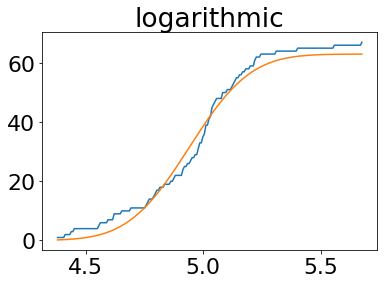

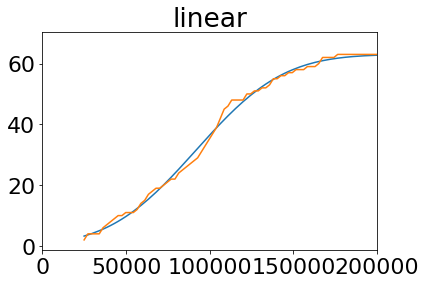

In [37]:
plt.plot(bins2, n2)
plt.plot(bins2, fitfunc(bins2, mu_found2, sigma_found2))
plt.title('logarithmic')

plt.figure()
plt.plot(bins_lin2, fitfunc(bins_lin2, mu_found_lin2, sigma_found_lin2))
plt.plot(bins_lin2, n_lin2)
plt.xlim(0, 200000)
plt.title('linear')

Text(500000, 0.6, 'Fit parameters:\nsample 1: mean 177291, sigma: 140891 \nsample 1 (re-measured): mean 91795, sigma: 41059')

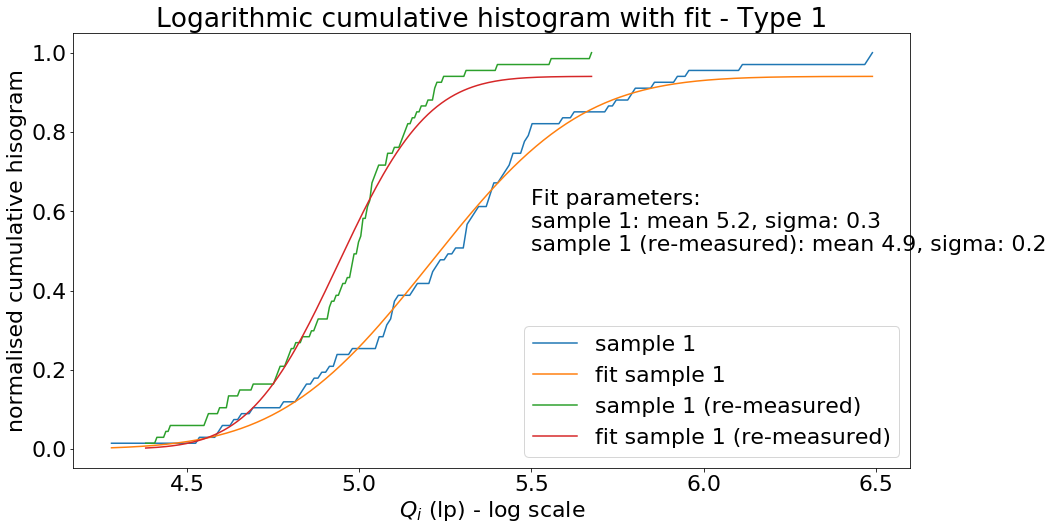

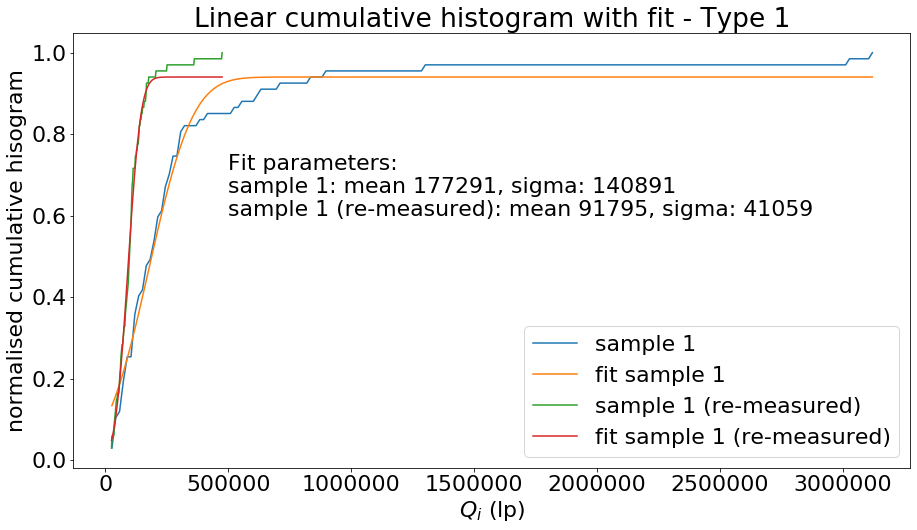

In [40]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(15, 8))
plt.plot(bins, n/67, label='sample 1')
plt.plot(bins, fitfunc(bins, mu_found, sigma_found)/67, label='fit sample 1')
plt.plot(bins2, n2/67, label='sample 1 (re-measured)')
plt.plot(bins2, fitfunc(bins2, mu_found2, sigma_found2)/67, label='fit sample 1 (re-measured)')
#plt.xaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
plt.title('Logarithmic cumulative histogram with fit - Type 1')
plt.xlabel('$Q_i$ (lp) - log scale')
plt.ylabel('normalised cumulative hisogram')
plt.legend()
plt.annotate('Fit parameters:\nsample 1: mean %.1f, sigma: %.1f \nsample 1 (re-measured): mean %.1f, sigma: %.1f' %(mu_found, sigma_found, mu_found2, sigma_found2), xy=(5.5,0.5))

plt.figure(figsize=(15, 8))
plt.plot(bins_lin, n_lin/67, label='sample 1')
plt.plot(bins_lin, fitfunc(bins_lin, mu_found_lin, sigma_found_lin)/67, label='fit sample 1')
plt.plot(bins_lin2, n_lin2/67, label='sample 1 (re-measured)')
plt.plot(bins_lin2, fitfunc(bins_lin2, mu_found_lin2, sigma_found_lin2)/67, label='fit sample 1 (re-measured)')
plt.legend()
plt.title('Linear cumulative histogram with fit - Type 1')
plt.xlabel('$Q_i$ (lp)')
plt.ylabel('normalised cumulative hisogram')
plt.annotate('Fit parameters:\nsample 1: mean %.f, sigma: %.f \nsample 1 (re-measured): mean %.f, sigma: %.f' %(mu_found_lin, sigma_found_lin, mu_found_lin2, sigma_found_lin2), xy=(500000,0.6))

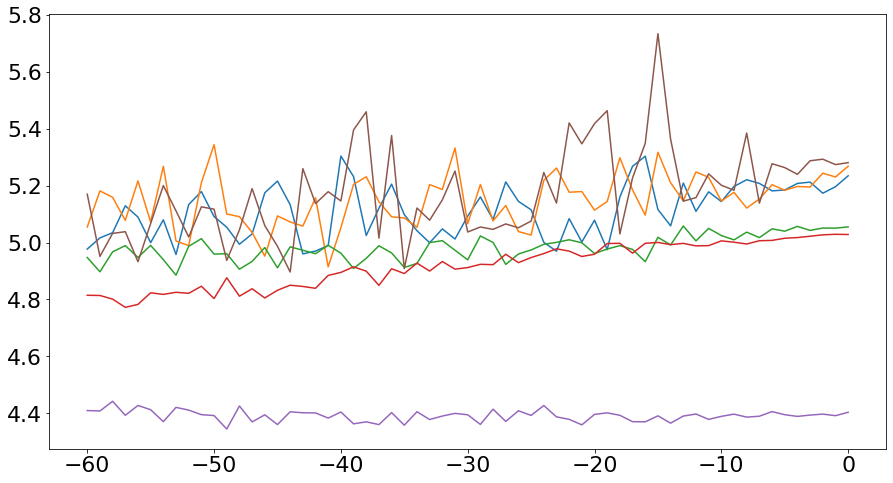

In [76]:
plt.figure(figsize=(15, 8))
for i in range(40,46):
    power_data = pd.read_csv (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Resonator sample 3\Measurements\Type 1\re-measurement\fit_total %d.csv' %(i))
    plt.plot(power_data['power'], np.log10(power_data['Qi_dia_corr']))
    
#plt.ylim(0, 400000)

#print(power_data['power'])

(0, 2000000)

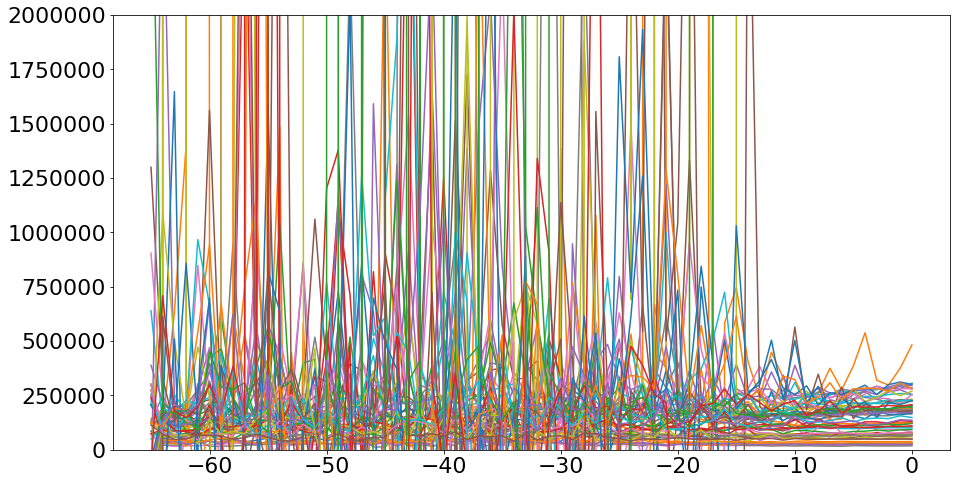

In [77]:
plt.figure(figsize=(15, 8))
for i in range(0,66):
    power_data = pd.read_csv (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Resonator sample 3\Measurements\Type 1\powerscan\fit_total %d.csv' %(i))
    plt.plot(power_data['power'], power_data['Qi_dia_corr'])
    
plt.ylim(0, 2000000)